<a href="https://colab.research.google.com/github/suacalis/IK_Analitigi_2026/blob/main/makine_ogrenmesi_egitim_notu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 MAKİNE ÖĞRENMESİ – Kapsamlı Eğitim Notu

## İnsan Kaynakları Analitiği Dersi için Python Uygulamaları

---

> Makine öğrenmesi, verilerden öğrenerek tahmin ve sınıflandırma yapabilen algoritmaları kapsar. Bu not defterinde **denetimli** (supervised) ve **denetimsiz** (unsupervised) makine öğrenmesi algoritmaları, İnsan Kaynakları senaryoları üzerinden uygulamalı olarak ele alınmaktadır.

### İçindekiler

**BÖLÜM A – Giriş ve Veri Hazırlığı**
1. Makine Öğrenmesine Giriş
2. Veri Ön İşleme (Preprocessing)
3. Eğitim-Test Bölünmesi ve Çapraz Doğrulama

**BÖLÜM B – Denetimli Öğrenme: Regresyon**
4. Basit Doğrusal Regresyon (`LinearRegression`)
5. Çoklu Doğrusal Regresyon
6. Lojistik Regresyon (`LogisticRegression`)

**BÖLÜM C – Denetimli Öğrenme: Sınıflandırma Algoritmaları**
7. Naive Bayes (`GaussianNB`)
8. K-En Yakın Komşu (`KNeighborsClassifier`)
9. Destek Vektör Makineleri (`SVC`)
10. Karar Ağacı (`DecisionTreeClassifier`)

**BÖLÜM D – Topluluk (Ensemble) Yöntemleri**
11. Bagging (`BaggingClassifier`)
12. Rastgele Orman (`RandomForestClassifier`)
13. AdaBoost (`AdaBoostClassifier`)
14. Gradient Boosting (`GradientBoostingClassifier`)

**BÖLÜM E – Denetimsiz Öğrenme**
15. Temel Bileşen Analizi – PCA
16. K-Means Kümeleme
17. Hiyerarşik Kümeleme (Agglomerative)

**BÖLÜM F – Model Değerlendirme ve Uygulama**
18. Model Değerlendirme Metrikleri
19. Hiperparametre Optimizasyonu (`GridSearchCV`)
20. Kapsamlı HR Analitik Pipeline
21. Çoktan Seçmeli Sorular
22. Algoritma Özet Tablosu ve Seçim Rehberi

---
# BÖLÜM A – Giriş ve Veri Hazırlığı
---

## 1. Makine Öğrenmesine Giriş

### 1.1 Makine Öğrenmesi Nedir?

Makine öğrenmesi, verilerden kalıpları öğrenerek tahminler yapan algoritmaları kapsar. İki ana kategorisi vardır:

| Tür | Açıklama | Bağımlı Değişken | HR Örneği |
|-----|----------|------------------|-----------|
| **Denetimli (Supervised)** | Etiketli veriden öğrenir | Var (hedef değişken) | Ayrılma tahmini, maaş tahmini |
| **Denetimsiz (Unsupervised)** | Etiketsiz veriden yapı keşfeder | Yok | Çalışan segmentasyonu, boyut indirgeme |

### 1.2 Denetimli Öğrenme Problem Türleri

| Problem | Bağımlı Değişken | Metrik | Algoritma Örnekleri |
|---------|-----------------|--------|---------------------|
| **Regresyon** | Sürekli (sayısal) | RMSE, R², MAE | Linear Reg., Decision Tree Reg., SVR |
| **Sınıflandırma** | Kategorik | Accuracy, F1, AUC | Logistic Reg., Naive Bayes, SVM, Decision Tree |

### 1.3 Temel ML İş Akışı

```
Veri Toplama → Veri Keşfi → Ön İşleme → Eğitim/Test Bölme
    → Model Geliştirme → Tahmin → Değerlendirme → Optimizasyon
```

In [1]:
# Temel kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn modülleri
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, mean_squared_error, r2_score)

# Denetimli algoritmalar
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Topluluk yöntemleri
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier,
                               AdaBoostClassifier, GradientBoostingClassifier,
                               RandomForestRegressor)

# Denetimsiz algoritmalar
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

print('Tüm kütüphaneler başarıyla yüklendi ✅')

Tüm kütüphaneler başarıyla yüklendi ✅


### 1.4 HR Veri Seti Oluşturma

Tüm örneklerde kullanılacak kapsamlı bir İK veri seti oluşturuyoruz. **Hedef değişken:** `Ayrilma` (çalışan şirketten ayrılacak mı?)

In [2]:
# ===== KAPSAMLI HR VERİ SETİ =====
np.random.seed(42)
n = 800

departmanlar = np.random.choice(
    ['Mühendislik', 'Pazarlama', 'İK', 'Finans', 'Operasyon', 'Satış'], n,
    p=[0.25, 0.17, 0.10, 0.15, 0.15, 0.18])

dept_maas = {'Mühendislik': 22000, 'Finans': 19000, 'Satış': 16000,
             'Pazarlama': 17000, 'İK': 15000, 'Operasyon': 15500}
poz_list = np.random.choice(['Junior', 'Mid', 'Senior', 'Lead', 'Müdür'], n,
                             p=[0.25, 0.30, 0.25, 0.12, 0.08])
poz_carpan = {'Junior': 1.0, 'Mid': 1.25, 'Senior': 1.55, 'Lead': 1.85, 'Müdür': 2.3}

hr = pd.DataFrame({
    'Yas': np.random.normal(34, 8, n).clip(22, 60).astype(int),
    'Cinsiyet': np.random.choice(['Erkek', 'Kadın'], n, p=[0.55, 0.45]),
    'Departman': departmanlar,
    'Pozisyon': poz_list,
    'Egitim': np.random.choice(['Lisans', 'Y.Lisans', 'Doktora'], n, p=[0.55, 0.35, 0.10]),
    'Kidem_Yil': np.random.exponential(4.5, n).clip(0.5, 22).round(1),
    'Calisma_Sekli': np.random.choice(['Ofis', 'Uzaktan', 'Hibrit'], n, p=[0.35, 0.30, 0.35]),
    'Performans': np.random.choice([1, 2, 3, 4, 5], n, p=[0.04, 0.12, 0.34, 0.32, 0.18]),
    'Memnuniyet': np.random.uniform(1.5, 10, n).round(1),
    'Egitim_Saati': np.random.normal(40, 15, n).clip(5, 100).astype(int),
    'Fazla_Mesai': np.random.choice([0, 1], n, p=[0.65, 0.35]),
    'Son_Terfi_Yil': np.random.choice([0, 1, 2, 3, 4, 5], n, p=[0.15, 0.20, 0.25, 0.20, 0.12, 0.08]),
    'Proje_Sayisi': np.random.poisson(4, n).clip(1, 12),
})

# Maaş hesapla
hr['Maas'] = hr.apply(
    lambda r: int(dept_maas[r['Departman']] * poz_carpan[r['Pozisyon']]
                  + r['Kidem_Yil'] * 400 + np.random.normal(0, 1500)), axis=1).clip(9000, 65000)

# HEDEF DEĞİŞKEN: Ayrılma (gerçekçi koşullarla)
ayrilma_olasilik = (
    (hr['Memnuniyet'] < 4).astype(float) * 0.30 +
    (hr['Fazla_Mesai'] == 1).astype(float) * 0.15 +
    (hr['Son_Terfi_Yil'] >= 4).astype(float) * 0.20 +
    (hr['Maas'] < 14000).astype(float) * 0.15 +
    (hr['Performans'] <= 2).astype(float) * 0.10 +
    np.random.uniform(0, 0.3, n)
)
hr['Ayrilma'] = (ayrilma_olasilik > 0.55).astype(int)

print(f'HR Veri Seti: {hr.shape[0]} satır × {hr.shape[1]} sütun')
print(f'\nHedef değişken dağılımı (Ayrilma):')
print(f'  0 (Aktif): {(hr["Ayrilma"]==0).sum()} ({(hr["Ayrilma"]==0).mean()*100:.1f}%)')
print(f'  1 (Ayrıldı): {(hr["Ayrilma"]==1).sum()} ({(hr["Ayrilma"]==1).mean()*100:.1f}%)')
hr.head()

HR Veri Seti: 800 satır × 15 sütun

Hedef değişken dağılımı (Ayrilma):
  0 (Aktif): 661 (82.6%)
  1 (Ayrıldı): 139 (17.4%)


,Yas,Cinsiyet,Departman,Pozisyon,Egitim,Kidem_Yil,Calisma_Sekli,Performans,Memnuniyet,Egitim_Saati,Fazla_Mesai,Son_Terfi_Yil,Proje_Sayisi,Maas,Ayrilma
0,29,Kadın,Pazarlama,Senior,Lisans,8.5,Uzaktan,3,6.0,42,0,2,4,28626,0
1,25,Erkek,Satış,Junior,Lisans,1.0,Uzaktan,2,6.6,33,1,4,8,17705,1
2,28,Kadın,Operasyon,Senior,Doktora,0.6,Hibrit,3,4.6,11,0,2,3,24728,0
3,24,Erkek,Finans,Senior,Lisans,14.9,Ofis,4,8.4,61,0,3,3,34901,0
4,34,Erkek,Mühendislik,Mid,Y.Lisans,0.5,Hibrit,3,5.9,21,0,2,8,26391,0


---
## 2. Veri Ön İşleme (Preprocessing)

Makine öğrenmesi algoritmalarına veri beslemeden önce yapılması gereken temel adımlar:

| Adım | Açıklama | Fonksiyon |
|------|----------|-----------|
| Kategorik kodlama | Metin → Sayı | `LabelEncoder()`, `pd.get_dummies()` |
| Ölçekleme | Değişkenleri aynı ölçeğe getirme | `StandardScaler()`, `MinMaxScaler()` |
| Eksik değer | Eksik verileri doldurma/silme | `fillna()`, `dropna()` |
| Özellik mühendisliği | Yeni değişken oluşturma | `apply()`, `lambda` |
| Aykırı değer | Z-skoru > 3 olanları tespit | `scipy.stats.zscore()` |

In [3]:
# ===== VERİ ÖN İŞLEME =====

# 2.1 Kategorik değişkenleri kodlama
# Yöntem 1: Label Encoding (sıralı kategoriler için)
le_poz = LabelEncoder()
hr['Pozisyon_Kod'] = le_poz.fit_transform(hr['Pozisyon'])
print('Pozisyon kodlama:', dict(zip(le_poz.classes_, le_poz.transform(le_poz.classes_))))

# Yöntem 2: One-Hot Encoding (sırasız kategoriler için)
hr_encoded = pd.get_dummies(hr, columns=['Cinsiyet', 'Departman', 'Egitim',
                                          'Calisma_Sekli', 'Pozisyon'],
                            drop_first=True, dtype=int)

print(f'\nKodlama öncesi sütun sayısı: {hr.shape[1]}')
print(f'Kodlama sonrası sütun sayısı: {hr_encoded.shape[1]}')

Pozisyon kodlama: {'Junior': np.int64(0), 'Lead': np.int64(1), 'Mid': np.int64(2), 'Müdür': np.int64(3), 'Senior': np.int64(4)}

Kodlama öncesi sütun sayısı: 16
Kodlama sonrası sütun sayısı: 25


In [4]:
# 2.2 Özellik ve hedef ayrımı
hedef = 'Ayrilma'
ozellikler = [c for c in hr_encoded.columns
              if c not in [hedef, 'Pozisyon_Kod']]

X = hr_encoded[ozellikler]
y = hr_encoded[hedef]

print(f'Özellik matrisi (X): {X.shape}')
print(f'Hedef vektörü (y): {y.shape}')
print(f'\nÖzellik listesi ({len(ozellikler)} adet):')
for i, col in enumerate(ozellikler, 1):
    print(f'  {i:2d}. {col}')

Özellik matrisi (X): (800, 23)
Hedef vektörü (y): (800,)

Özellik listesi (23 adet):
   1. Yas
   2. Kidem_Yil
   3. Performans
   4. Memnuniyet
   5. Egitim_Saati
   6. Fazla_Mesai
   7. Son_Terfi_Yil
   8. Proje_Sayisi
   9. Maas
  10. Cinsiyet_Kadın
  11. Departman_Mühendislik
  12. Departman_Operasyon
  13. Departman_Pazarlama
  14. Departman_Satış
  15. Departman_İK
  16. Egitim_Lisans
  17. Egitim_Y.Lisans
  18. Calisma_Sekli_Ofis
  19. Calisma_Sekli_Uzaktan
  20. Pozisyon_Lead
  21. Pozisyon_Mid
  22. Pozisyon_Müdür
  23. Pozisyon_Senior


In [5]:
# 2.3 Ölçekleme (StandardScaler)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print('Ölçekleme öncesi (ilk 3 sütun):')
print(X[X.columns[:3]].describe().loc[['mean', 'std']].round(2))
print()
print('Ölçekleme sonrası (ilk 3 sütun):')
print(X_scaled[X.columns[:3]].describe().loc[['mean', 'std']].round(2))

Ölçekleme öncesi (ilk 3 sütun):
        Yas  Kidem_Yil  Performans
mean  34.08       4.41        3.46
std    7.42       4.27        1.05

Ölçekleme sonrası (ilk 3 sütun):
      Yas  Kidem_Yil  Performans
mean -0.0       -0.0        -0.0
std   1.0        1.0         1.0


---
## 3. Eğitim-Test Bölünmesi ve Çapraz Doğrulama

`train_test_split()` fonksiyonu ile veri **eğitim** ve **test** setlerine ayrılır. Model eğitim seti üzerinde geliştirilir, test seti üzerinde değerlendirilir.

`cross_val_score()` fonksiyonu ile model farklı alt kümelerde test edilerek daha güvenilir bir doğruluk tahmini elde edilir.

In [6]:
# Eğitim-Test bölmesi (%70-%30)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(f'Eğitim seti: {X_train.shape[0]} satır ({X_train.shape[0]/len(X)*100:.0f}%)')
print(f'Test seti:   {X_test.shape[0]} satır ({X_test.shape[0]/len(X)*100:.0f}%)')
print(f'\nHedef dağılımı (eğitim): 0={sum(y_train==0)}, 1={sum(y_train==1)}')
print(f'Hedef dağılımı (test):   0={sum(y_test==0)}, 1={sum(y_test==1)}')

Eğitim seti: 560 satır (70%)
Test seti:   240 satır (30%)

Hedef dağılımı (eğitim): 0=463, 1=97
Hedef dağılımı (test):   0=198, 1=42


---
# BÖLÜM B – Denetimli Öğrenme: Regresyon
---

## 4. Basit Doğrusal Regresyon

Tek bağımsız değişkenle sürekli bir bağımlı değişkeni tahmin eder.

**Fonksiyon:** `LinearRegression()` → `sklearn.linear_model`

**HR Senaryosu:** Kıdem yılından maaşı tahmin etme.

Katsayı (β₁): 283.83
Kesişim (β₀): 25,817.98
Denklem: Maaş = 25,818 + 284 × Kıdem

RMSE: 9,318.60 TL
R² skoru: 0.0261
R² yorumu: Kıdem, maaş varyansının %2.6'ini açıklıyor.


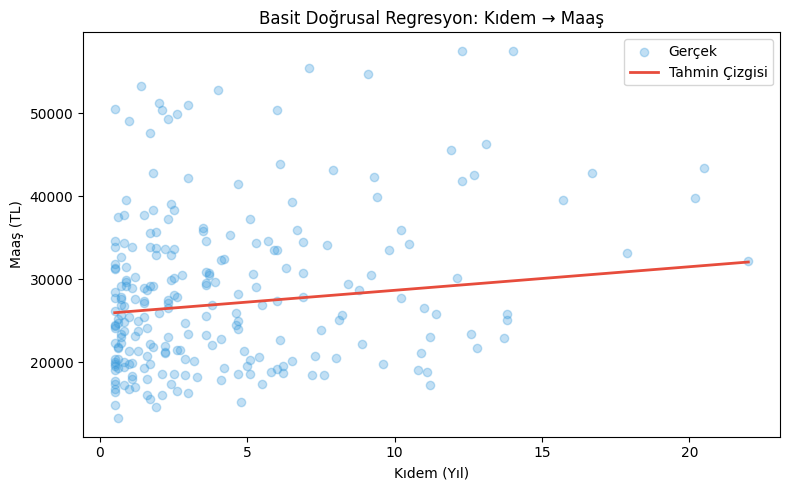

In [7]:
# Basit Doğrusal Regresyon: Kıdem → Maaş
from math import sqrt

X_reg = hr[['Kidem_Yil']]
y_reg = hr['Maas']

X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(
    X_reg, y_reg, test_size=0.30, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_r_train, y_r_train)

# Katsayılar
print(f'Katsayı (β₁): {model_lr.coef_[0]:,.2f}')
print(f'Kesişim (β₀): {model_lr.intercept_:,.2f}')
print(f'Denklem: Maaş = {model_lr.intercept_:,.0f} + {model_lr.coef_[0]:,.0f} × Kıdem')

# Tahmin ve değerlendirme
y_r_pred = model_lr.predict(X_r_test)
rmse = sqrt(mean_squared_error(y_r_test, y_r_pred))
r2 = r2_score(y_r_test, y_r_pred)

print(f'\nRMSE: {rmse:,.2f} TL')
print(f'R² skoru: {r2:.4f}')
print(f'R² yorumu: Kıdem, maaş varyansının %{r2*100:.1f}\'ini açıklıyor.')

# Görselleştirme
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(X_r_test, y_r_test, alpha=0.3, label='Gerçek', color='#3498DB')
ax.plot(X_r_test.sort_values('Kidem_Yil'), model_lr.predict(X_r_test.sort_values('Kidem_Yil')),
        color='#E74C3C', linewidth=2, label='Tahmin Çizgisi')
ax.set_xlabel('Kıdem (Yıl)'); ax.set_ylabel('Maaş (TL)')
ax.set_title('Basit Doğrusal Regresyon: Kıdem → Maaş')
ax.legend(); plt.tight_layout(); plt.show()

---
## 5. Çoklu Doğrusal Regresyon

Birden fazla bağımsız değişkenle sürekli bir bağımlı değişkeni tahmin eder.

**HR Senaryosu:** Yaş, kıdem, performans, eğitim saati ve pozisyon ile maaş tahmini.

In [8]:
# Çoklu Doğrusal Regresyon: Birden fazla değişken → Maaş
reg_cols = ['Yas', 'Kidem_Yil', 'Performans', 'Egitim_Saati',
            'Proje_Sayisi', 'Fazla_Mesai']

# Pozisyon ve departman kodlama
hr_reg = pd.get_dummies(hr[reg_cols + ['Pozisyon', 'Departman']],
                        drop_first=True, dtype=int)
y_mreg = hr['Maas']

X_mr_train, X_mr_test, y_mr_train, y_mr_test = train_test_split(
    hr_reg, y_mreg, test_size=0.30, random_state=42)

# Ölçekleme
scaler_reg = StandardScaler()
X_mr_train_s = scaler_reg.fit_transform(X_mr_train)
X_mr_test_s = scaler_reg.transform(X_mr_test)

model_mlr = LinearRegression()
model_mlr.fit(X_mr_train_s, y_mr_train)

y_mr_pred = model_mlr.predict(X_mr_test_s)
rmse_m = sqrt(mean_squared_error(y_mr_test, y_mr_pred))
r2_m = r2_score(y_mr_test, y_mr_pred)

print(f'Çoklu Regresyon Sonuçları:')
print(f'  RMSE: {rmse_m:,.2f} TL')
print(f'  R²:   {r2_m:.4f} (%{r2_m*100:.1f} varyans açıklandı)')

# Değişken önem sırası
koeff = pd.Series(model_mlr.coef_, index=hr_reg.columns)
print(f'\nEn etkili 5 değişken (mutlak katsayı):')
print(koeff.abs().sort_values(ascending=False).head(5).round(2))

Çoklu Regresyon Sonuçları:
  RMSE: 2,022.92 TL
  R²:   0.9541 (%95.4 varyans açıklandı)

En etkili 5 değişken (mutlak katsayı):
Pozisyon_Müdür         5847.42
Pozisyon_Lead          4923.53
Pozisyon_Senior        4309.17
Pozisyon_Mid           1980.19
Departman_Operasyon    1909.43
dtype: float64


---
## 6. Lojistik Regresyon

Kategorik bir bağımlı değişkeni (sınıflandırma) tahmin eder. Olasılık bazlı çalışır.

**Fonksiyon:** `LogisticRegression()` → `sklearn.linear_model`

**HR Senaryosu:** Çalışan ayrılma tahmini (0=Aktif, 1=Ayrılma).

In [9]:
# Lojistik Regresyon: Çalışan Ayrılma Tahmini
model_logr = LogisticRegression(max_iter=1000, random_state=42)
model_logr.fit(X_train, y_train)

y_pred_logr = model_logr.predict(X_test)
y_prob_logr = model_logr.predict_proba(X_test)[:, 1]

acc_logr = accuracy_score(y_test, y_pred_logr)
print(f'Lojistik Regresyon Doğruluk: %{acc_logr*100:.2f}')
print(f'\nKarışıklık Matrisi:')
print(confusion_matrix(y_test, y_pred_logr))
print(f'\nSınıflandırma Raporu:')
print(classification_report(y_test, y_pred_logr, target_names=['Aktif', 'Ayrıldı']))

Lojistik Regresyon Doğruluk: %87.08

Karışıklık Matrisi:
[[185  13]
 [ 18  24]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       Aktif       0.91      0.93      0.92       198
     Ayrıldı       0.65      0.57      0.61        42

    accuracy                           0.87       240
   macro avg       0.78      0.75      0.77       240
weighted avg       0.87      0.87      0.87       240



---
# BÖLÜM C – Denetimli Öğrenme: Sınıflandırma Algoritmaları
---

## 7. Naive Bayes (`GaussianNB`)

Bayes teoremine dayanan sınıflandırma tekniğidir. Değişkenlerin birbirinden **bağımsız** olduğu varsayımına dayanır.

**Avantajları:** Kolay, hızlı, büyük veri setlerinde etkili.

**Fonksiyon:** `GaussianNB()` → `sklearn.naive_bayes`

In [10]:
# Naive Bayes: Çalışan Ayrılma Tahmini
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred_nb = model_nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f'Naive Bayes Doğruluk: %{acc_nb*100:.2f}')
print(f'\nKarışıklık Matrisi:')
print(confusion_matrix(y_test, y_pred_nb))
print(f'\nSınıflandırma Raporu:')
print(classification_report(y_test, y_pred_nb, target_names=['Aktif', 'Ayrıldı']))

Naive Bayes Doğruluk: %85.83

Karışıklık Matrisi:
[[187  11]
 [ 23  19]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       Aktif       0.89      0.94      0.92       198
     Ayrıldı       0.63      0.45      0.53        42

    accuracy                           0.86       240
   macro avg       0.76      0.70      0.72       240
weighted avg       0.85      0.86      0.85       240



---
## 8. K-En Yakın Komşu (KNN)

Her yeni gözlemi, eğitim setindeki **en yakın k komşusunun** çoğunluk oyuna göre sınıflandırır. `k` parametresi kritiktir.

**Fonksiyon:** `KNeighborsClassifier(n_neighbors=k)` → `sklearn.neighbors`

**Önemli:** Düşük k → karmaşık model (overfitting), Yüksek k → basit model (underfitting). Optimal k çapraz doğrulama ile belirlenir.

Optimal k değeri: 11 (CV doğruluk: %83.21)


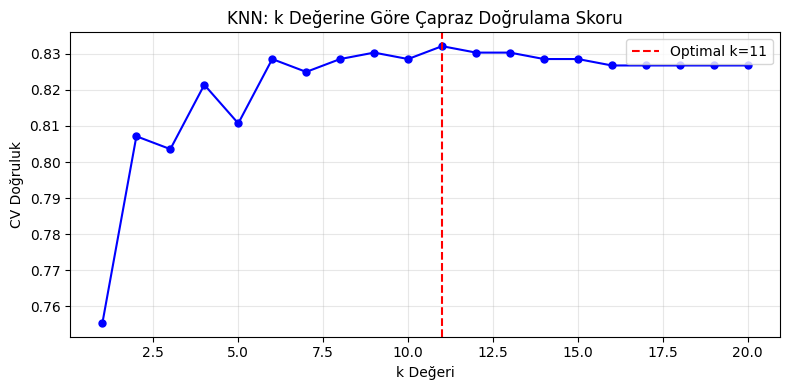

In [11]:
# KNN: Optimal k değerini bulma
k_degerleri = range(1, 21)
cv_skorlari = []

for k in k_degerleri:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    skor = cross_val_score(knn_temp, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_skorlari.append(skor)

optimal_k = k_degerleri[np.argmax(cv_skorlari)]
print(f'Optimal k değeri: {optimal_k} (CV doğruluk: %{max(cv_skorlari)*100:.2f})')

# Görselleştirme
plt.figure(figsize=(8, 4))
plt.plot(k_degerleri, cv_skorlari, 'bo-', markersize=5)
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel('k Değeri'); plt.ylabel('CV Doğruluk')
plt.title('KNN: k Değerine Göre Çapraz Doğrulama Skoru')
plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

In [12]:
# KNN modeli (optimal k ile)
model_knn = KNeighborsClassifier(n_neighbors=optimal_k)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f'KNN (k={optimal_k}) Doğruluk: %{acc_knn*100:.2f}')
print(f'\nSınıflandırma Raporu:')
print(classification_report(y_test, y_pred_knn, target_names=['Aktif', 'Ayrıldı']))

KNN (k=11) Doğruluk: %83.33

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       Aktif       0.83      1.00      0.91       198
     Ayrıldı       1.00      0.05      0.09        42

    accuracy                           0.83       240
   macro avg       0.92      0.52      0.50       240
weighted avg       0.86      0.83      0.77       240



---
## 9. Destek Vektör Makineleri (SVM)

Veri noktalarını n-boyutlu uzayda sınıflara ayıran **optimal bir hiper-düzlem** bulur. Bilinmeyen dağılımlı ve düzensiz veriler için uygundur.

**Fonksiyon:** `SVC()` → `sklearn.svm` (sınıflandırma), `SVR()` → regresyon

**Çekirdek türleri:** `'linear'`, `'rbf'` (varsayılan), `'poly'`, `'sigmoid'`

In [13]:
# SVM: Çalışan Ayrılma Tahmini
model_svm = SVC(kernel='rbf', probability=True, random_state=42)
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f'SVM (RBF kernel) Doğruluk: %{acc_svm*100:.2f}')
print(f'\nSınıflandırma Raporu:')
print(classification_report(y_test, y_pred_svm, target_names=['Aktif', 'Ayrıldı']))

SVM (RBF kernel) Doğruluk: %85.42

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       Aktif       0.86      0.99      0.92       198
     Ayrıldı       0.82      0.21      0.34        42

    accuracy                           0.85       240
   macro avg       0.84      0.60      0.63       240
weighted avg       0.85      0.85      0.82       240



---
## 10. Karar Ağacı (Decision Tree)

Kararları ve sonuçlarını ağaç yapısında gösteren, anlaşılması kolay bir algoritmadır. Hem sınıflandırma hem regresyon için kullanılabilir.

**Fonksiyon:** `DecisionTreeClassifier()` → `sklearn.tree`

**Ne zaman kullanılır:**
- Değişkenler arası yüksek doğrusal olmayışlık ve karmaşık ilişkiler varsa
- Analitik olmayan kişilere sonuçlar görsel olarak sunulacaksa
- Aykırı değerler ve eksik verilerden etkilenmez (parametrik olmayan)

**Ne zaman kullanılmaz:**
- Doğrusal ilişki varsa (doğrusal regresyon tercih edilir)
- Overfitting riski yüksektir (budama/pruning ile çözülür)

**Önemli parametreler:** `max_depth`, `criterion` (`'gini'` / `'entropy'`), `min_samples_split`

Karar Ağacı Doğruluk: %89.58
  Eğitim doğruluğu: %95.54
  Test doğruluğu:   %89.58


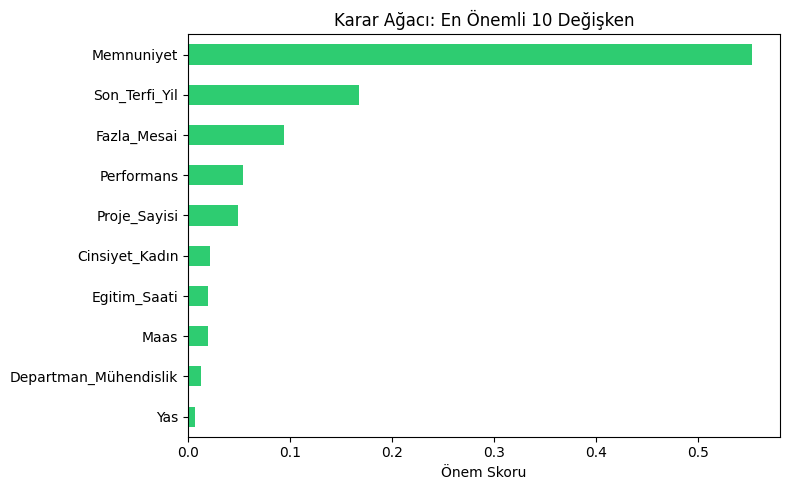

In [14]:
# Karar Ağacı: Çalışan Ayrılma Tahmini
model_dt = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

print(f'Karar Ağacı Doğruluk: %{acc_dt*100:.2f}')
print(f'  Eğitim doğruluğu: %{model_dt.score(X_train, y_train)*100:.2f}')
print(f'  Test doğruluğu:   %{acc_dt*100:.2f}')

# Değişken önem sıralaması
onem = pd.Series(model_dt.feature_importances_, index=X_train.columns)
onem_sirali = onem.sort_values(ascending=True).tail(10)

plt.figure(figsize=(8, 5))
onem_sirali.plot(kind='barh', color='#2ECC71')
plt.xlabel('Önem Skoru')
plt.title('Karar Ağacı: En Önemli 10 Değişken')
plt.tight_layout(); plt.show()

---
# BÖLÜM D – Topluluk (Ensemble) Yöntemleri
---

Topluluk yöntemleri, birden fazla zayıf modeli birleştirerek güçlü bir model oluşturur.

| Yöntem | Strateji | Avantaj |
|--------|----------|--------|
| **Bagging** | Paralel öğrenme, çoğunluk oyu | Varyans azaltır |
| **Random Forest** | Bagging + rastgele değişken seçimi | Overfitting'i azaltır |
| **AdaBoost** | Sıralı öğrenme, hatalara odaklanma | Bias azaltır |
| **Gradient Boosting** | Sıralı öğrenme, gradyan optimizasyonu | En güçlü tahmin |

## 11. Bagging

**Fonksiyon:** `BaggingClassifier()` → `sklearn.ensemble`

In [15]:
# Bagging
model_bag = BaggingClassifier(n_estimators=100, random_state=42)
model_bag.fit(X_train, y_train)

y_pred_bag = model_bag.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)
print(f'Bagging Doğruluk: %{acc_bag*100:.2f}')
print(classification_report(y_test, y_pred_bag, target_names=['Aktif', 'Ayrıldı']))

Bagging Doğruluk: %88.75
              precision    recall  f1-score   support

       Aktif       0.92      0.94      0.93       198
     Ayrıldı       0.70      0.62      0.66        42

    accuracy                           0.89       240
   macro avg       0.81      0.78      0.80       240
weighted avg       0.88      0.89      0.88       240



---
## 12. Rastgele Orman (Random Forest)

Bagging'in gelişmiş halidir. Ağaç oluştururken her düğümde **rastgele bir değişken alt kümesi** seçilir. Bu sayede ağaçlar daha bağımsız olur ve overfitting azalır.

**Fonksiyon:** `RandomForestClassifier()` → `sklearn.ensemble`

**Avantajları:** Güçlü tahmin, ölçekleme gerektirmez, değişken önemini gösterir.

**Dezavantajları:** Regresyon problemlerinde eğitim verisi aralığı dışı tahmin yapamaz.

Random Forest Doğruluk: %88.75
  Eğitim: %100.00
  Test:   %88.75


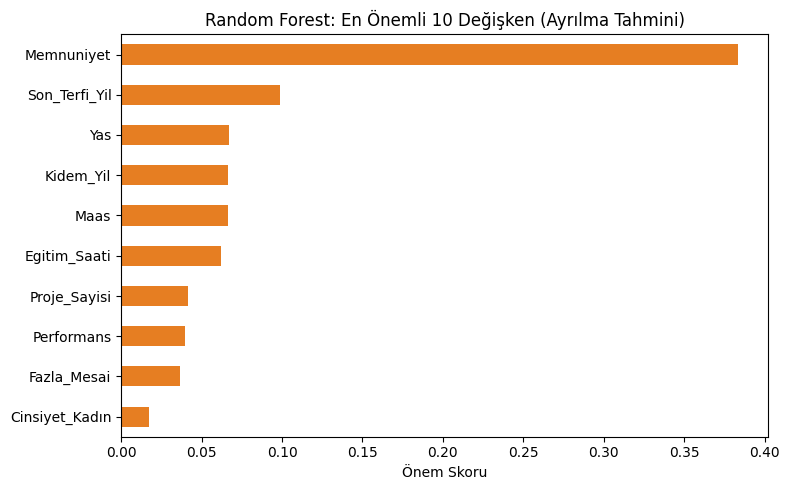


Sınıflandırma Raporu:
              precision    recall  f1-score   support

       Aktif       0.90      0.97      0.93       198
     Ayrıldı       0.80      0.48      0.60        42

    accuracy                           0.89       240
   macro avg       0.85      0.73      0.77       240
weighted avg       0.88      0.89      0.88       240



In [16]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=200, max_depth=10,
                                   random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f'Random Forest Doğruluk: %{acc_rf*100:.2f}')
print(f'  Eğitim: %{model_rf.score(X_train, y_train)*100:.2f}')
print(f'  Test:   %{acc_rf*100:.2f}')

# Değişken önem sıralaması
onem_rf = pd.Series(model_rf.feature_importances_, index=X_train.columns)
top10 = onem_rf.sort_values(ascending=True).tail(10)

plt.figure(figsize=(8, 5))
top10.plot(kind='barh', color='#E67E22')
plt.xlabel('Önem Skoru')
plt.title('Random Forest: En Önemli 10 Değişken (Ayrılma Tahmini)')
plt.tight_layout(); plt.show()

print(f'\nSınıflandırma Raporu:')
print(classification_report(y_test, y_pred_rf, target_names=['Aktif', 'Ayrıldı']))

---
## 13. AdaBoost

Her yeni ağaç, önceki ağacın **yanlış sınıflandırdığı gözlemlere** daha fazla ağırlık verir. `learning_rate` (0-1) parametresi her ağacın etkisini kontrol eder.

**Fonksiyon:** `AdaBoostClassifier()` → `sklearn.ensemble`

In [17]:
# AdaBoost
model_ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_ada.fit(X_train, y_train)

y_pred_ada = model_ada.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)
print(f'AdaBoost Doğruluk: %{acc_ada*100:.2f}')
print(classification_report(y_test, y_pred_ada, target_names=['Aktif', 'Ayrıldı']))

AdaBoost Doğruluk: %91.67
              precision    recall  f1-score   support

       Aktif       0.93      0.97      0.95       198
     Ayrıldı       0.84      0.64      0.73        42

    accuracy                           0.92       240
   macro avg       0.89      0.81      0.84       240
weighted avg       0.91      0.92      0.91       240



---
## 14. Gradient Boosting

Her yeni ağaç, önceki modelin **hatalarının (residual) gradyanını** minimize etmeye çalışır. Genellikle en yüksek tahmin gücüne sahiptir.

**Fonksiyon:** `GradientBoostingClassifier()` → `sklearn.ensemble`

In [18]:
# Gradient Boosting
model_gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,
                                       max_depth=4, random_state=42)
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Doğruluk: %{acc_gb*100:.2f}')
print(classification_report(y_test, y_pred_gb, target_names=['Aktif', 'Ayrıldı']))

Gradient Boosting Doğruluk: %90.83
              precision    recall  f1-score   support

       Aktif       0.93      0.96      0.95       198
     Ayrıldı       0.79      0.64      0.71        42

    accuracy                           0.91       240
   macro avg       0.86      0.80      0.83       240
weighted avg       0.90      0.91      0.90       240



---
# BÖLÜM E – Denetimsiz Öğrenme
---

## 15. Temel Bileşen Analizi – PCA

Çok sayıda değişkeni, bilgi kaybını minimize ederek **daha az sayıda bileşene** indirger. İlk bileşen en yüksek varyansı, ikincisi kalan en yüksek varyansı açıklar.

**Fonksiyon:** `PCA(n_components)` → `sklearn.decomposition`

**Kullanım alanları:** Boyut indirgeme, görselleştirme, çoklu doğrusallığı azaltma, model performansını artırma.

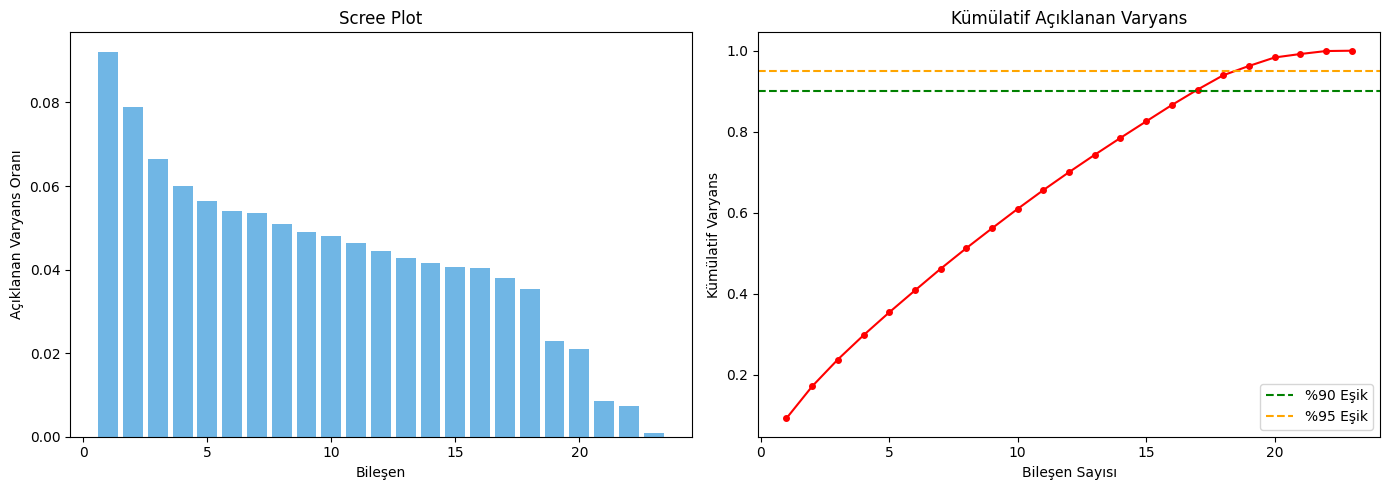

%90 varyans için: 17 bileşen
%95 varyans için: 19 bileşen
Orijinal boyut: 23 → İndirgenen: 17


In [19]:
# PCA: Boyut indirgeme
pca_full = PCA()
pca_full.fit(X_scaled)

# Açıklanan varyans
aciklanan = pca_full.explained_variance_ratio_
kumulatif = np.cumsum(aciklanan)

# Scree Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.bar(range(1, len(aciklanan)+1), aciklanan, color='#3498DB', alpha=0.7)
ax1.set_xlabel('Bileşen'); ax1.set_ylabel('Açıklanan Varyans Oranı')
ax1.set_title('Scree Plot')

ax2.plot(range(1, len(kumulatif)+1), kumulatif, 'ro-', markersize=4)
ax2.axhline(y=0.90, color='green', linestyle='--', label='%90 Eşik')
ax2.axhline(y=0.95, color='orange', linestyle='--', label='%95 Eşik')
ax2.set_xlabel('Bileşen Sayısı'); ax2.set_ylabel('Kümülatif Varyans')
ax2.set_title('Kümülatif Açıklanan Varyans'); ax2.legend()

plt.tight_layout(); plt.show()

# %90 varyans için gereken bileşen sayısı
n_90 = np.argmax(kumulatif >= 0.90) + 1
n_95 = np.argmax(kumulatif >= 0.95) + 1
print(f'%90 varyans için: {n_90} bileşen')
print(f'%95 varyans için: {n_95} bileşen')
print(f'Orijinal boyut: {X_scaled.shape[1]} → İndirgenen: {n_90}')

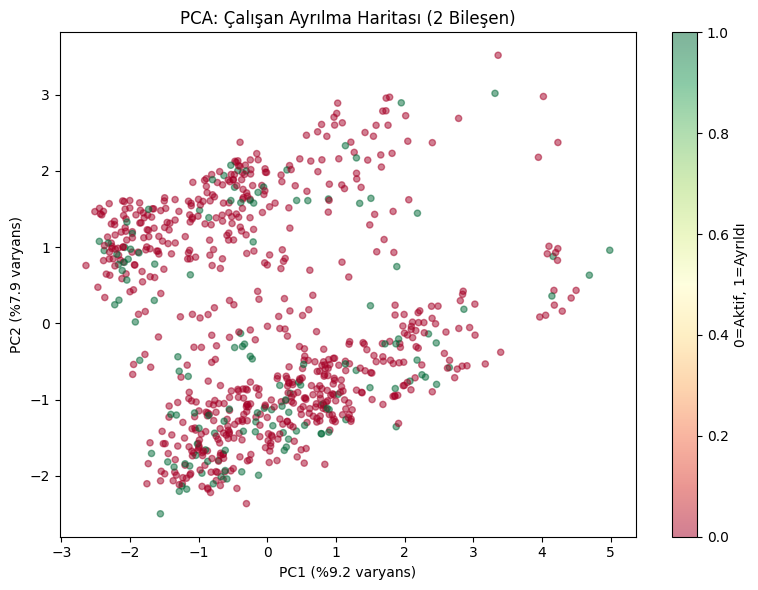

In [20]:
# PCA ile 2D görselleştirme
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='RdYlGn',
                      alpha=0.5, s=20)
plt.colorbar(scatter, label='0=Aktif, 1=Ayrıldı')
plt.xlabel(f'PC1 (%{aciklanan[0]*100:.1f} varyans)')
plt.ylabel(f'PC2 (%{aciklanan[1]*100:.1f} varyans)')
plt.title('PCA: Çalışan Ayrılma Haritası (2 Bileşen)')
plt.tight_layout(); plt.show()

---
## 16. K-Means Kümeleme

Verileri **k adet kümeye** böler. Her kümenin merkezi (centroid) hesaplanır ve gözlemler en yakın merkeze atanır. Optimum k değeri **Elbow (dirsek) yöntemi** ile belirlenir.

**Fonksiyon:** `KMeans(n_clusters)` → `sklearn.cluster`

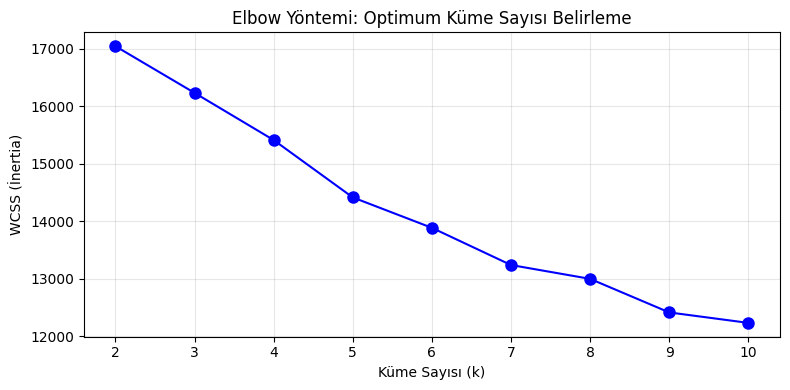

In [21]:
# Elbow (Dirsek) yöntemi: Optimum küme sayısı
wcss = []  # Within Cluster Sum of Squares
K_range = range(2, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    wcss.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Küme Sayısı (k)'); plt.ylabel('WCSS (İnertia)')
plt.title('Elbow Yöntemi: Optimum Küme Sayısı Belirleme')
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

=== Küme Profilleri ===
      Sayi  Ort_Yas  Ort_Maas  Ort_Kidem  Ort_Memnuniyet  Ort_Performans  \
Kume                                                                       
0      201    33.84  26110.83       4.60            5.69            3.41   
1      270    33.91  25497.81       4.06            5.75            3.51   
2       67    36.28  43933.37       4.41            5.75            3.40   
3      262    33.86  26338.87       4.64            5.60            3.47   

      Ayrilma_Orani  
Kume                 
0              0.19  
1              0.16  
2              0.18  
3              0.18  


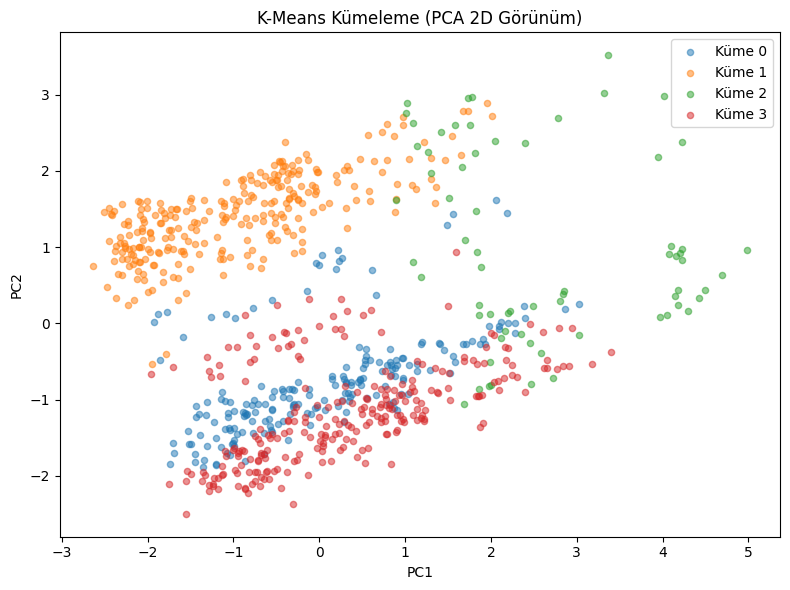

In [22]:
# K-Means kümeleme (4 küme)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
hr['Kume'] = kmeans.fit_predict(X_scaled)

# Küme profilleri
profil = hr.groupby('Kume').agg(
    Sayi=('Yas', 'count'),
    Ort_Yas=('Yas', 'mean'),
    Ort_Maas=('Maas', 'mean'),
    Ort_Kidem=('Kidem_Yil', 'mean'),
    Ort_Memnuniyet=('Memnuniyet', 'mean'),
    Ort_Performans=('Performans', 'mean'),
    Ayrilma_Orani=('Ayrilma', 'mean')
).round(2)

print('=== Küme Profilleri ===')
print(profil)

# PCA ile küme görselleştirme
plt.figure(figsize=(8, 6))
for k in range(4):
    mask = hr['Kume'] == k
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Küme {k}',
                alpha=0.5, s=20)
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('K-Means Kümeleme (PCA 2D Görünüm)')
plt.legend(); plt.tight_layout(); plt.show()

---
## 17. Hiyerarşik Kümeleme (Agglomerative)

Alt-üst (bottom-up) yaklaşımla her gözlem tek bir küme olarak başlar ve en yakın kümeler birleştirilir. **Dendrogram** ile küme yapısı görselleştirilir.

**Fonksiyon:** `AgglomerativeClustering()` → `sklearn.cluster`

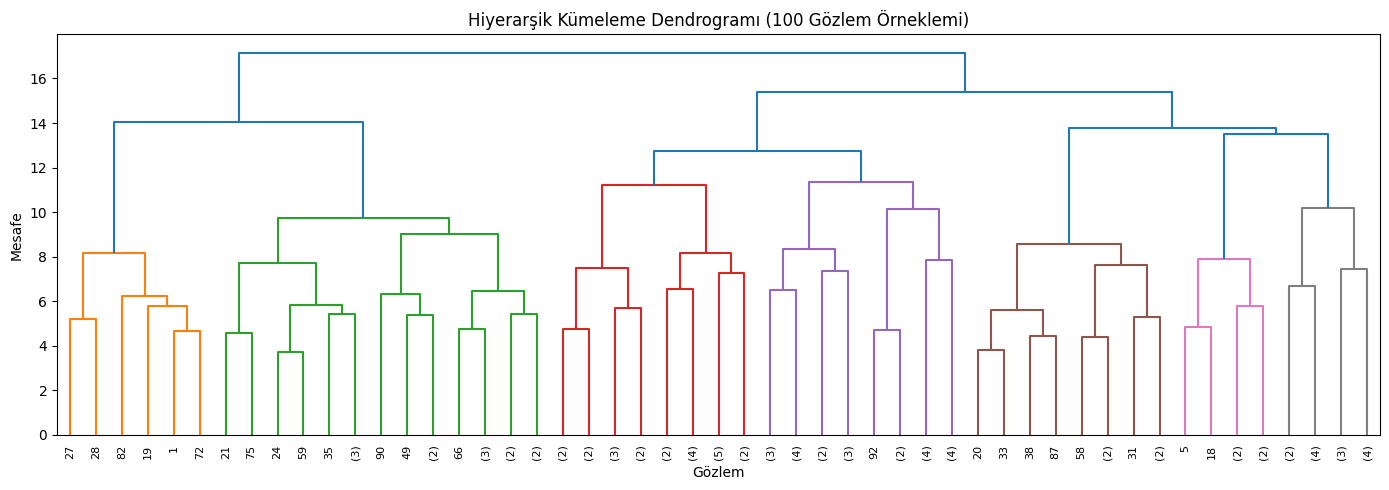

=== Hiyerarşik Küme Dağılımı ===
Hiyerarsik_Kume
0    588
1     85
2     67
3     60
Name: count, dtype: int64


In [23]:
from scipy.cluster.hierarchy import dendrogram, ward

# Alt örneklem (dendrogram için)
sample_idx = np.random.choice(len(X_scaled), 100, replace=False)
X_sample = X_scaled.iloc[sample_idx]

# Ward linkage
linkage = ward(X_sample)

plt.figure(figsize=(14, 5))
dendrogram(linkage, truncate_mode='level', p=5, leaf_font_size=8)
plt.xlabel('Gözlem'); plt.ylabel('Mesafe')
plt.title('Hiyerarşik Kümeleme Dendrogramı (100 Gözlem Örneklemi)')
plt.tight_layout(); plt.show()

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4)
hr['Hiyerarsik_Kume'] = agg.fit_predict(X_scaled)

print('=== Hiyerarşik Küme Dağılımı ===')
print(hr['Hiyerarsik_Kume'].value_counts().sort_index())

---
# BÖLÜM F – Model Değerlendirme ve Uygulama
---

## 18. Model Değerlendirme Metrikleri

### 18.1 Regresyon Metrikleri

| Metrik | Açıklama | İdeal Değer |
|--------|----------|-------------|
| **RMSE** | Ortalama tahmin hatası | 0'a yakın |
| **R²** | Açıklanan varyans oranı | 1'e yakın |
| **MAE** | Ortalama mutlak hata | 0'a yakın |

### 18.2 Sınıflandırma Metrikleri

| Metrik | Açıklama | Aralık |
|--------|----------|--------|
| **Accuracy** | Doğru tahmin oranı | 0-1 |
| **Precision** | Pozitif tahmin doğruluğu (TP/TP+FP) | 0-1 |
| **Recall** | Gerçek pozitifleri yakalama oranı (TP/TP+FN) | 0-1 |
| **F1-Score** | Precision ve Recall'un harmonik ortalaması | 0-1 |
| **AUC** | ROC eğrisi altındaki alan | 0.5-1 |

### 18.3 Karışıklık Matrisi (Confusion Matrix)

|  | Tahmin: Aktif | Tahmin: Ayrıldı |
|--|---------------|-----------------|
| **Gerçek: Aktif** | TP (Doğru Pozitif) | FN (Yanlış Negatif) |
| **Gerçek: Ayrıldı** | FP (Yanlış Pozitif) | TN (Doğru Negatif) |

📊 MODEL KARŞILAŞTIRMA TABLOSU
 1. AdaBoost                  %91.67  ██████████████████
 2. Gradient Boosting         %90.83  ██████████████████
 3. Karar Ağacı               %89.58  █████████████████
 4. Bagging                   %88.75  █████████████████
 5. Random Forest             %88.75  █████████████████
 6. Lojistik Regresyon        %87.08  █████████████████
 7. Naive Bayes               %85.83  █████████████████
 8. SVM (RBF)                 %85.42  █████████████████
 9. KNN (k=11)                %83.33  ████████████████


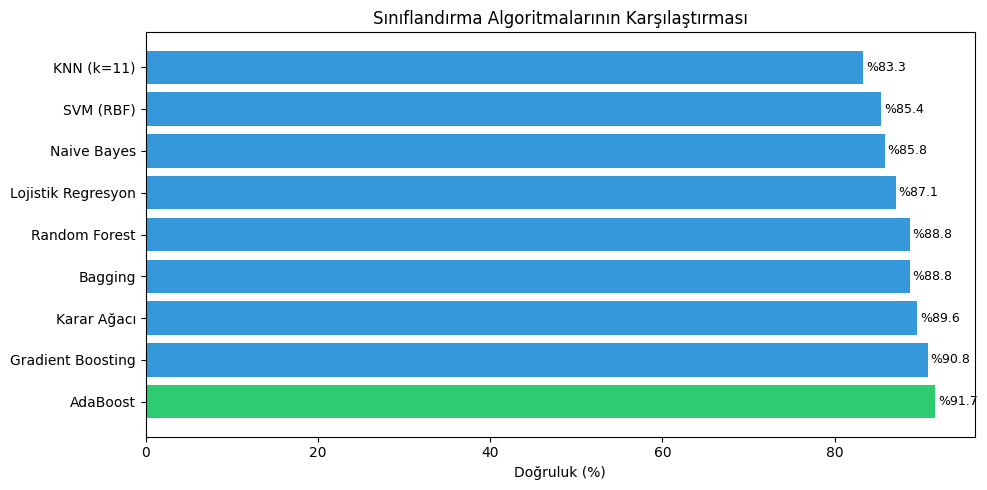

In [24]:
# ===== TÜM MODELLERİN KARŞILAŞTIRILMASI =====
sonuclar = {
    'Lojistik Regresyon': acc_logr,
    'Naive Bayes': acc_nb,
    f'KNN (k={optimal_k})': acc_knn,
    'SVM (RBF)': acc_svm,
    'Karar Ağacı': acc_dt,
    'Bagging': acc_bag,
    'Random Forest': acc_rf,
    'AdaBoost': acc_ada,
    'Gradient Boosting': acc_gb,
}

# Sıralama
sonuc_df = pd.DataFrame({
    'Model': sonuclar.keys(),
    'Doğruluk': [v*100 for v in sonuclar.values()]
}).sort_values('Doğruluk', ascending=False).reset_index(drop=True)
sonuc_df.index += 1

print('📊 MODEL KARŞILAŞTIRMA TABLOSU')
print('=' * 45)
for i, row in sonuc_df.iterrows():
    bar = '█' * int(row['Doğruluk'] / 5)
    print(f'{i:2d}. {row["Model"]:<25s} %{row["Doğruluk"]:.2f}  {bar}')

# Görsel karşılaştırma
plt.figure(figsize=(10, 5))
colors = ['#2ECC71' if i == 0 else '#3498DB' for i in range(len(sonuc_df))]
bars = plt.barh(sonuc_df['Model'], sonuc_df['Doğruluk'], color=colors)
plt.xlabel('Doğruluk (%)')
plt.title('Sınıflandırma Algoritmalarının Karşılaştırması')
for bar, val in zip(bars, sonuc_df['Doğruluk']):
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             f'%{val:.1f}', va='center', fontsize=9)
plt.tight_layout(); plt.show()

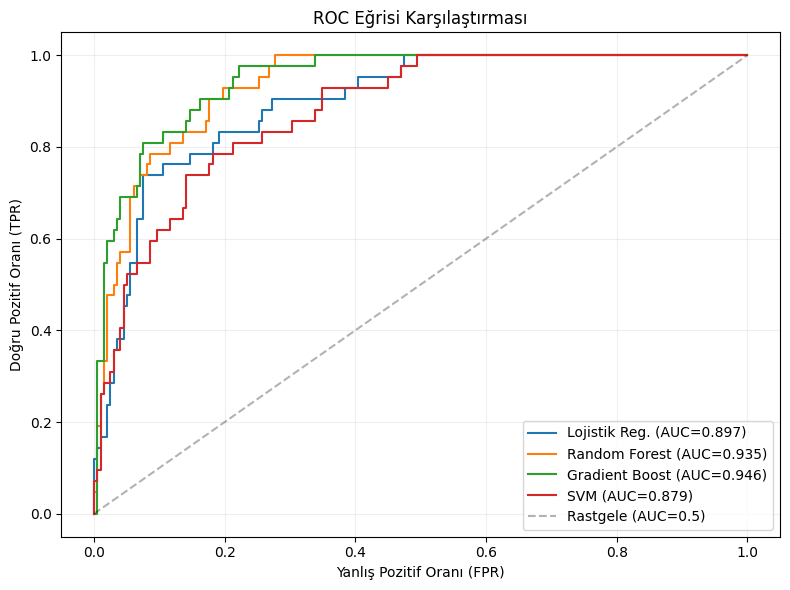

In [25]:
# ROC Eğrisi: En iyi 4 model
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

modeller_roc = {
    'Lojistik Reg.': model_logr,
    'Random Forest': model_rf,
    'Gradient Boost': model_gb,
    'SVM': model_svm,
}

for isim, model in modeller_roc.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_val = roc_auc_score(y_test, y_prob)
    ax.plot(fpr, tpr, label=f'{isim} (AUC={auc_val:.3f})')

ax.plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Rastgele (AUC=0.5)')
ax.set_xlabel('Yanlış Pozitif Oranı (FPR)')
ax.set_ylabel('Doğru Pozitif Oranı (TPR)')
ax.set_title('ROC Eğrisi Karşılaştırması')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.2)
plt.tight_layout(); plt.show()

---
## 19. Hiperparametre Optimizasyonu (`GridSearchCV`)

`GridSearchCV`, belirlenen parametre ızgarasındaki tüm kombinasyonları çapraz doğrulama ile deneyerek en iyi parametreleri bulur.

In [26]:
# GridSearchCV: Random Forest hiperparametre optimizasyonu
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid, cv=5, scoring='accuracy',
    n_jobs=-1, verbose=0)

grid_search.fit(X_train, y_train)

print(f'En iyi parametreler: {grid_search.best_params_}')
print(f'En iyi CV doğruluğu: %{grid_search.best_score_*100:.2f}')

# En iyi model ile test
y_pred_best = grid_search.best_estimator_.predict(X_test)
acc_best = accuracy_score(y_test, y_pred_best)
print(f'Test doğruluğu (optimizasyon sonrası): %{acc_best*100:.2f}')

En iyi parametreler: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
En iyi CV doğruluğu: %89.82
Test doğruluğu (optimizasyon sonrası): %89.17


---
## 20. Kapsamlı HR Analitik Pipeline

Tüm adımları birleştiren uçtan uca bir ML pipeline oluşturuyoruz:

In [27]:
# ===== KAPSAMLI HR ANALİTİK PIPELINE =====
from sklearn.pipeline import Pipeline

print('=' * 60)
print('   İK ANALİTİK – ÇALIŞAN AYRILMA TAHMİN RAPORU   ')
print('=' * 60)
print()

# 1) Veri Özeti
print('📋 VERİ ÖZETİ')
print(f'   Toplam çalışan: {len(hr)}')
print(f'   Aktif: {(hr["Ayrilma"]==0).sum()} | Ayrılan: {(hr["Ayrilma"]==1).sum()}')
print(f'   Özellik sayısı: {X_scaled.shape[1]}')
print()

# 2) Çapraz doğrulama ile model karşılaştırma
print('🔄 ÇAPRAZ DOĞRULAMA SONUÇLARI (5-Fold)')
cv_modeller = {
    'Loj. Regresyon': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=optimal_k),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Karar Ağacı': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    'Gradient Boost': GradientBoostingClassifier(n_estimators=200, random_state=42),
}

cv_sonuc = {}
for isim, model in cv_modeller.items():
    skorlar = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_sonuc[isim] = {'Ortalama': skorlar.mean(), 'Std': skorlar.std()}
    print(f'   {isim:<20s}: %{skorlar.mean()*100:.2f} (±{skorlar.std()*100:.2f})')

# 3) En iyi model ile detaylı analiz
en_iyi = max(cv_sonuc, key=lambda x: cv_sonuc[x]['Ortalama'])
print(f'\n🏆 EN İYİ MODEL: {en_iyi}')
print()

# 4) Risk Analizi
print('⚠️  RİSK ANALİZİ')
best_model = cv_modeller[en_iyi]
best_model.fit(X_train, y_train)
if hasattr(best_model, 'predict_proba'):
    risk_prob = best_model.predict_proba(X_scaled)[:, 1]
    hr['Ayrilma_Risk'] = risk_prob
    yuksek_risk = hr[hr['Ayrilma_Risk'] > 0.7]
    print(f'   Yüksek riskli çalışan (>%70): {len(yuksek_risk)} kişi')
    if len(yuksek_risk) > 0:
        print(f'   Risk profili:')
        print(f'     Ort. maaş: {yuksek_risk["Maas"].mean():,.0f} TL')
        print(f'     Ort. memnuniyet: {yuksek_risk["Memnuniyet"].mean():.1f}/10')
        print(f'     Ort. kıdem: {yuksek_risk["Kidem_Yil"].mean():.1f} yıl')

# 5) Departman bazında risk
if 'Ayrilma_Risk' in hr.columns:
    print(f'\n🏢 DEPARTMAN BAZINDA AYRILMA RİSKİ')
    dept_risk = hr.groupby('Departman')['Ayrilma_Risk'].mean().sort_values(ascending=False)
    for dept, risk in dept_risk.items():
        bar = '█' * int(risk * 40)
        print(f'   {dept:<15s}: %{risk*100:.1f}  {bar}')

print(f'\n✅ Pipeline tamamlandı!')

   İK ANALİTİK – ÇALIŞAN AYRILMA TAHMİN RAPORU   

📋 VERİ ÖZETİ
   Toplam çalışan: 800
   Aktif: 661 | Ayrılan: 139
   Özellik sayısı: 23

🔄 ÇAPRAZ DOĞRULAMA SONUÇLARI (5-Fold)
   Loj. Regresyon      : %88.00 (±1.08)
   Naive Bayes         : %85.00 (±2.71)
   KNN                 : %83.12 (±0.68)
   SVM                 : %86.00 (±1.02)
   Karar Ağacı         : %90.62 (±1.90)
   Random Forest       : %89.50 (±2.14)
   Gradient Boost      : %91.00 (±0.64)

🏆 EN İYİ MODEL: Gradient Boost

⚠️  RİSK ANALİZİ
   Yüksek riskli çalışan (>%70): 131 kişi
   Risk profili:
     Ort. maaş: 27,754 TL
     Ort. memnuniyet: 3.0/10
     Ort. kıdem: 4.9 yıl

🏢 DEPARTMAN BAZINDA AYRILMA RİSKİ
   Satış          : %23.2  █████████
   Pazarlama      : %20.3  ████████
   Operasyon      : %17.3  ██████
   İK             : %15.3  ██████
   Mühendislik    : %14.8  █████
   Finans         : %10.8  ████

✅ Pipeline tamamlandı!


---
## 22. Algoritma Özet Tablosu ve Seçim Rehberi

### 22.1 Denetimli Öğrenme Algoritmaları

| Algoritma | Tür | Fonksiyon | Kütüphane | HR Kullanımı |
|-----------|-----|-----------|-----------|--------------|
| Doğrusal Regresyon | Regresyon | `LinearRegression()` | `sklearn.linear_model` | Maaş tahmini |
| Lojistik Regresyon | Sınıflandırma | `LogisticRegression()` | `sklearn.linear_model` | Ayrılma tahmini |
| Naive Bayes | Sınıflandırma | `GaussianNB()` | `sklearn.naive_bayes` | Hızlı sınıflandırma |
| KNN | Her ikisi | `KNeighborsClassifier()` | `sklearn.neighbors` | Performans sınıflandırma |
| SVM | Her ikisi | `SVC()` / `SVR()` | `sklearn.svm` | Karmaşık sınır problemleri |
| Karar Ağacı | Her ikisi | `DecisionTreeClassifier()` | `sklearn.tree` | Görsel kural çıkarma |
| Random Forest | Her ikisi | `RandomForestClassifier()` | `sklearn.ensemble` | Güçlü tahmin, değişken önemi |
| AdaBoost | Her ikisi | `AdaBoostClassifier()` | `sklearn.ensemble` | Zayıf modelleri güçlendirme |
| Gradient Boosting | Her ikisi | `GradientBoostingClassifier()` | `sklearn.ensemble` | En yüksek doğruluk |

### 22.2 Denetimsiz Öğrenme Algoritmaları

| Algoritma | Tür | Fonksiyon | Kütüphane | HR Kullanımı |
|-----------|-----|-----------|-----------|--------------|
| PCA | Boyut İndirgeme | `PCA()` | `sklearn.decomposition` | Çok değişkenli veride sadeleştirme |
| K-Means | Kümeleme | `KMeans()` | `sklearn.cluster` | Çalışan segmentasyonu |
| Hiyerarşik | Kümeleme | `AgglomerativeClustering()` | `sklearn.cluster` | Performans gruplandırma |

### 22.3 Model Değerlendirme

| Metrik | Fonksiyon | Problem Türü |
|--------|-----------|-------------|
| RMSE | `sqrt(mean_squared_error())` | Regresyon |
| R² | `r2_score()` | Regresyon |
| Accuracy | `accuracy_score()` | Sınıflandırma |
| Confusion Matrix | `confusion_matrix()` | Sınıflandırma |
| Classification Report | `classification_report()` | Sınıflandırma |
| ROC / AUC | `roc_curve()` / `roc_auc_score()` | Sınıflandırma |

### 22.4 Algoritma Seçim Rehberi

| Durum | Önerilen Algoritma |
|-------|-------------------|
| Hızlı sonuç gerekli, büyük veri | Naive Bayes |
| Doğrusal ilişki var | Doğrusal / Lojistik Regresyon |
| Karmaşık ilişki, görsel sunum | Karar Ağacı |
| En yüksek doğruluk | Gradient Boosting / Random Forest |
| Bilinmeyen dağılım, düzensiz veri | SVM |
| Çalışan segmentasyonu | K-Means Kümeleme |
| Boyut indirgeme / görselleştirme | PCA |
| Overfitting problemi | Random Forest (Bagging yerine) |

---
### 📌 Kaynaklar

- Scikit-learn Resmi Dokümantasyon: https://scikit-learn.org/stable/
- Scikit-learn Algoritma Seçim Haritası: https://scikit-learn.org/stable/tutorial/machine_learning_map/
- Kaggle ML Rehberi: https://www.kaggle.com/learn

---